##### EXERCÍCIO AVALIATIVO 05: Redes Complexas

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import rustworkx as rx
import numpy as np
from scipy.io import mmread

In [3]:
def build_network(N, Z, p):
    G = nx.Graph()

    # Adicionar nós e arestas curtas
    for i in range(N):
        for j in range(1, Z // 2 + 1):
            G.add_edge(i, (i + j) % N)
            G.add_edge(i, (i - j) % N)

    # Adicionar aleatoriamente atalhos
    for i in range(N):
        for j in range(1, Z // 2 + 1):
            if np.random.rand() < p:
                G.add_edge(i, np.random.randint(0, N))

    return G

In [4]:
def FindPathLengthsFromNode(graph, node):
    distances = {}  # Armazenar as distâncias mais curtas
    currentShell = [node]  # Inicializar a camada atual com o nó inicial
    d = 0  # Inicializar a distância como 0

    while currentShell:
        nextShell = []  # Inicializar a próxima camada

        for current_node in currentShell:
            if current_node not in distances:
                distances[current_node] = d  # Definir a distância do nó atual
                nextShell.extend(graph.neighbors(current_node))

        d += 1  # Incrementar a distância
        currentShell = nextShell  # Atualizar para a próxima camada

    return distances

In [5]:
def FindAllPathLengths(graph):
    all_lengths = []

    for node in graph.nodes:
        distances = FindPathLengthsFromNode(graph, node)
        all_lengths.extend(list(distances.values()))

    return all_lengths

In [32]:
def FindAveragePathLength(graph):
    total_length = 0
    num_pairs = 0

    for source in graph.nodes:
        distances = FindPathLengthsFromNode(graph, source)
        total_length += sum(distances.values())
        num_pairs += len(distances)

    return total_length / num_pairs

In [8]:
def get_d_norm(graph, p_base=0):
    d_base = nx.average_shortest_path_length(build_network(N, Z, p_base))
    d_atual = nx.average_shortest_path_length(graph)
    return d_atual / d_base

In [9]:
def get_redim_lengths(N, Z, p):
    while True:
        graph = nx.watts_strogatz_graph(N, Z, p)
        if nx.is_connected(graph):
            break
   
    d = nx.average_shortest_path_length(graph)
    delta_theta = np.pi * Z * d / N
    return delta_theta

**01. Geração da rede mini mundo**

In [10]:
# Parâmetros
N = 20  # Número de nós
Z = 3   # Grau médio
p = 0.5 # Probabilidade de adicionar atalhos

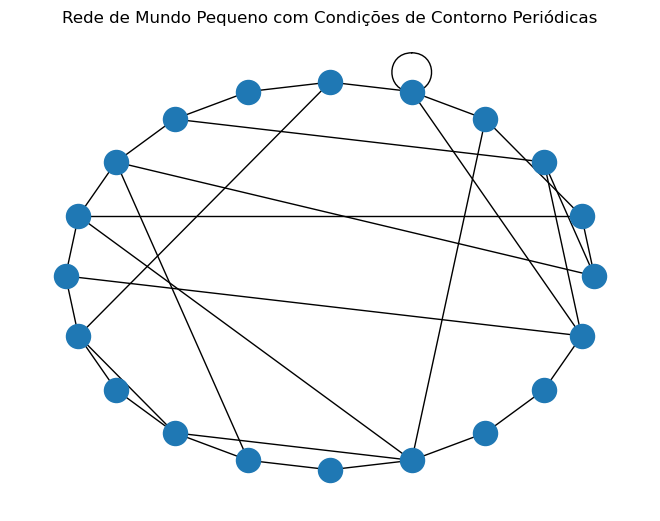

In [11]:
# Construir a rede
G = build_network(N, Z, p)

# Desenhar o grafo de mundo pequeno
nx.draw_circular(G, font_weight='bold')
plt.title('Rede de Mundo Pequeno com Condições de Contorno Periódicas')
plt.show()

**02. Distribuição das distâncias mínimas entre os nós**

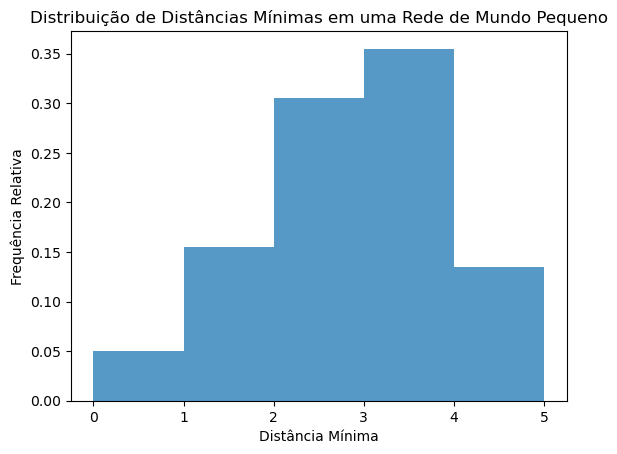

In [12]:
caminhos_mais_curtos = dict(nx.all_pairs_shortest_path_length(G))

# Extrair distâncias mínimas para cada par de nós
distancias_minimas = [dist for node_dist in caminhos_mais_curtos.values() for dist in node_dist.values()]

# Plotar histograma
plt.hist(distancias_minimas, bins=np.arange(0, max(distancias_minimas)+1, 1), density=True, alpha=0.75)
plt.xlabel('Distância Mínima')
plt.ylabel('Frequência Relativa')
plt.title('Distribuição de Distâncias Mínimas em uma Rede de Mundo Pequeno')
plt.show()

In [13]:
N = 1000
Z = 2

In [14]:
p = 0.02

# Construir o grafo
graph = build_network(N, Z, p)

# Calcular ⟨𝑑⟩
d_avg = FindAveragePathLength(graph)

# Calcular os comprimentos de caminho
all_lengths = []
for node in graph.nodes:
    distances = FindPathLengthsFromNode(graph, node)
    all_lengths.extend(list(distances.values()))

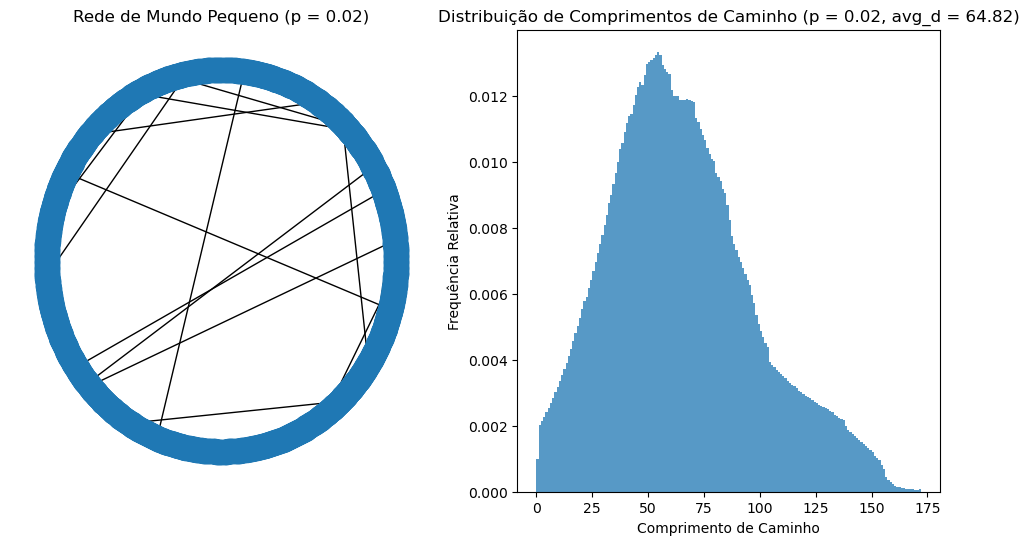

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Rede
plt.subplot(1, 2, 1)
nx.draw_circular(graph)
plt.title(f'Rede de Mundo Pequeno (p = {p})')

# Histograma
plt.subplot(1, 2, 2)
plt.hist(all_lengths, bins=np.arange(0, max(all_lengths)+1, 1), density=True, alpha=0.75)
plt.xlabel('Comprimento de Caminho')
plt.ylabel('Frequência Relativa')
plt.title(f'Distribuição de Comprimentos de Caminho (p = {p}, avg_d = {d_avg:.2f})')

# Adjust layout to prevent overlap
#plt.tight_layout()
plt.show()

In [16]:
p = 0.2

# Construir o grafo
graph = build_network(N, Z, p)

# Calcular ⟨𝑑⟩
d_avg = FindAveragePathLength(graph)

# Calcular os comprimentos de caminho
all_lengths = []
for node in graph.nodes:
    distances = FindPathLengthsFromNode(graph, node)
    all_lengths.extend(list(distances.values()))

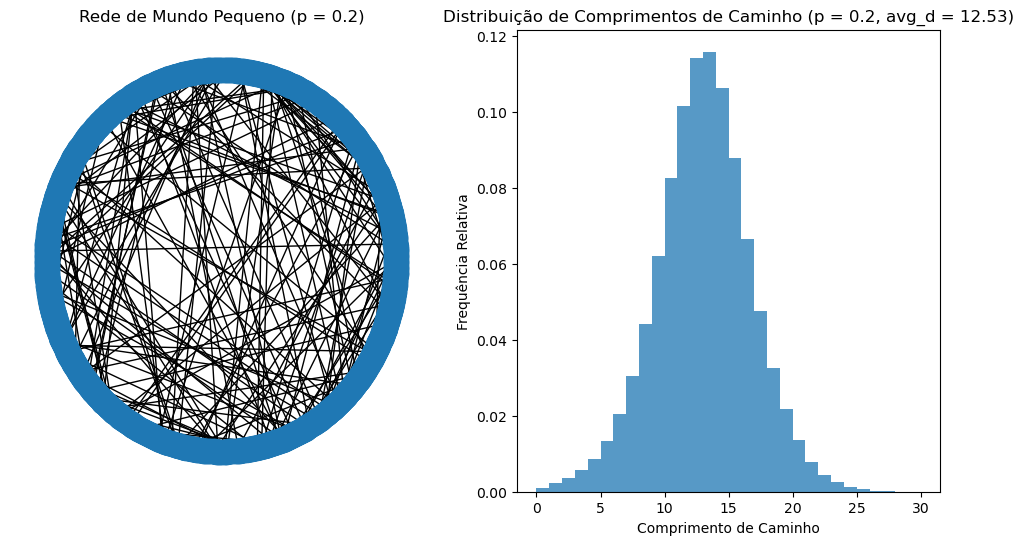

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Rede
plt.subplot(1, 2, 1)
nx.draw_circular(graph)
plt.title(f'Rede de Mundo Pequeno (p = {p})')

# Histograma
plt.subplot(1, 2, 2)
plt.hist(all_lengths, bins=np.arange(0, max(all_lengths)+1, 1), density=True, alpha=0.75)
plt.xlabel('Comprimento de Caminho')
plt.ylabel('Frequência Relativa')
plt.title(f'Distribuição de Comprimentos de Caminho (p = {p}, avg_d = {d_avg:.2f})')

# Adjust layout to prevent overlap
#plt.tight_layout()
plt.show()

**0.2.1. Análise dos histogramas:**

**02.2. Seis graus de separação**

In [18]:
N = 1000  # Número de nós
Z = 2     # Grau médio
target_avg_path_length = 6  # Alvo para ⟨𝑑⟩

# Valor inicial de p
p = 0.01

# Tolerância para a diferença entre ⟨𝑑⟩ e o alvo
tolerance = 0.1

while True:
    # Construir o grafo
    grafo = construir_rede_mundo_pequeno(N, Z, p)

    # Calcular ⟨𝑑⟩
    avg_path_length = FindAveragePathLength(grafo)

    # Exibir o valor atual de p e ⟨𝑑⟩
    #print(f'p = {p:.4f}, ⟨𝑑⟩ = {avg_path_length:.4f}')

    # Verificar se atingimos o alvo
    if abs(avg_path_length - target_avg_path_length) < tolerance:
        print(f'\nAlcançamos o alvo de ⟨𝑑⟩ = {target_avg_path_length} com p = {p:.4f}')
        break

    # Ajustar o valor de p para a próxima iteração
    p += 0.01

NameError: name 'construir_rede_mundo_pequeno' is not defined

**02.3. Média do tamanho dos caminhos**

In [ ]:
# Parâmetros
N = 100  # Número de nós
Z = 2    # Grau médio
p = 0.1  # Probabilidade de reconfiguração

# Número de execuções
num_execucoes = 10

# Calcular ⟨𝑑⟩ para diferentes execuções
resultados_d = []

for _ in range(num_execucoes):
    # Construir a rede
    grafo = build_network(N, Z, p)

    # Calcular ⟨𝑑⟩
    d_medio = FindAveragePathLength(grafo)
    resultados_d.append(d_medio)

    # Exibir o valor de ⟨𝑑⟩ para esta execução
    #print(f'Execução: ⟨𝑑⟩ = {d_medio:.4f}')

# Exibir o valor médio de ⟨𝑑⟩ e a variabilidade
media_d = np.mean(resultados_d)
desvio_padrao_d = np.std(resultados_d)

print(f'\nValor médio de ⟨𝑑⟩: {media_d:.4f}')

**02.4. Arestas longas** 

In [ ]:
N*p*Z/2

**02.5. Flutuações nas distâncias**

In [ ]:
print(f'Desvio padrão de ⟨𝑑⟩: {desvio_padrao_d:.4f}')

**02.6. Comprimento médio entre os caminhos d(p), dividido por d(p=0)**

In [ ]:
# Parâmetros
N = 50   # Número de nós
Z = 2    # Grau médio

# Gerar valores de p igualmente espaçados em escala logarítmica
valores_p = np.logspace(-3, 3, num=100)

# Calcular comprimento médio do caminho normalizado para diferentes valores de p
d_norm_list = []

for p in valores_p:
    grafo = build_network(N, Z, p)
    d_norm = get_d_norm(grafo)
    d_norm_list.append(d_norm)

# Deslocar valores de p por um fator de 100
valores_p_deslocados = valores_p * 100

In [ ]:
# Plotar o gráfico semi-log
plt.semilogx(valores_p_deslocados, resultados_d_norm, marker='o', linestyle='-')
plt.xlabel('p (deslocado por um fator de 100)')
plt.ylabel('Comprimento Médio do Caminho Normalizado ($d(p) / d(p=0)$)')
plt.title('Comprimento Médio do Caminho Normalizado em Função de p')
plt.grid(True)
plt.show()

In [ ]:
# Parâmetros
N = 50   # Número de nós
Z = 2    # Grau médio
p = 0.1

graph = build_network(N, Z, p)
nx.draw_circular(graph)
plt.title(f'Rede de Mundo Pequeno (p = {p})')
plt.show()

**03.1. Grafo para geometria de Watts e Strogatz**

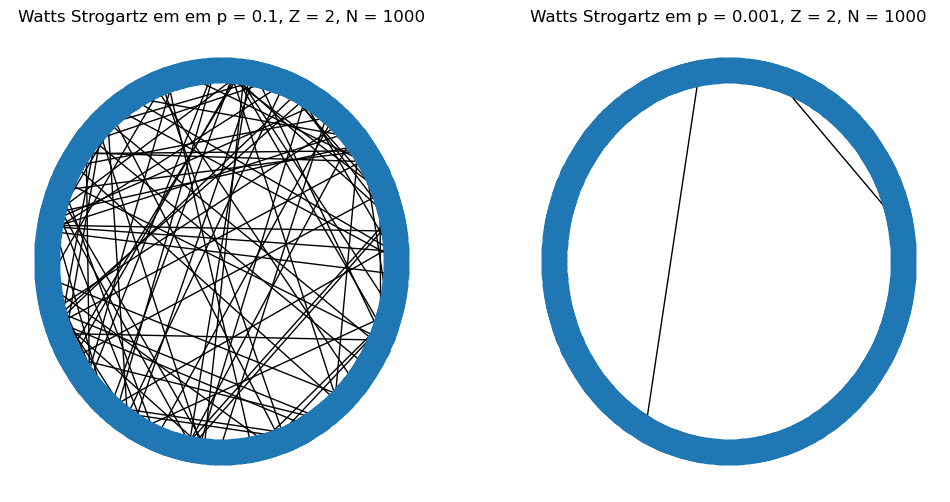

In [19]:
p1 = 0.1
p2 = 0.001

graph1 = nx.watts_strogatz_graph(N, Z, p1)
graph2 = nx.watts_strogatz_graph(N, Z, p2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Rede
plt.subplot(1, 2, 1)
nx.draw_circular(graph1)
plt.title(f'Watts Strogartz em em p = {p1}, Z = {Z}, N = {N}')

# Histograma
plt.subplot(1, 2, 2)
nx.draw_circular(graph2)
plt.title(f'Watts Strogartz em p = {p2}, Z = {Z}, N = {N}')

plt.show()

**03.2. Comprimento médio do caminho redimensionado**

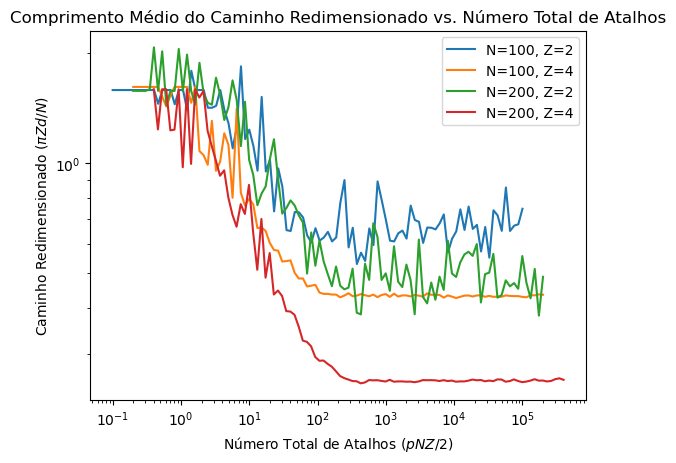

In [20]:
N_vec = [100, 200]
Z_vec = [2, 4]
p_range = np.logspace(-3, 3, 100)

# Plotar o gráfico
for N in N_vec:
    for Z in Z_vec:
        redim_lengths = [get_redim_lengths(N, Z, p) for p in p_range]
        plt.loglog(p_range * N * Z / 2, redim_lengths, label=f'N={N}, Z={Z}')

plt.xlabel('Número Total de Atalhos ($pNZ/2$)')
plt.ylabel('Caminho Redimensionado ($\pi Z d / N$)')
plt.title('Comprimento Médio do Caminho Redimensionado vs. Número Total de Atalhos')
plt.legend()
plt.show()

**04. Redes reais**

In [21]:
karate_network = np.array(mmread("soc-karate/soc-karate.mtx").toarray())

In [22]:
karate_network

array([[0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [23]:
graph = nx.DiGraph(karate_network)

**04.1. Distância média**

In [35]:
avg_path = FindAveragePathLength(graph)

In [36]:
avg_path

2.337370242214533

In [37]:
distances = [len(nx.shortest_path(graph, source, target)) - 1
              for source in graph.nodes()
              for target in graph.nodes() if source != target]

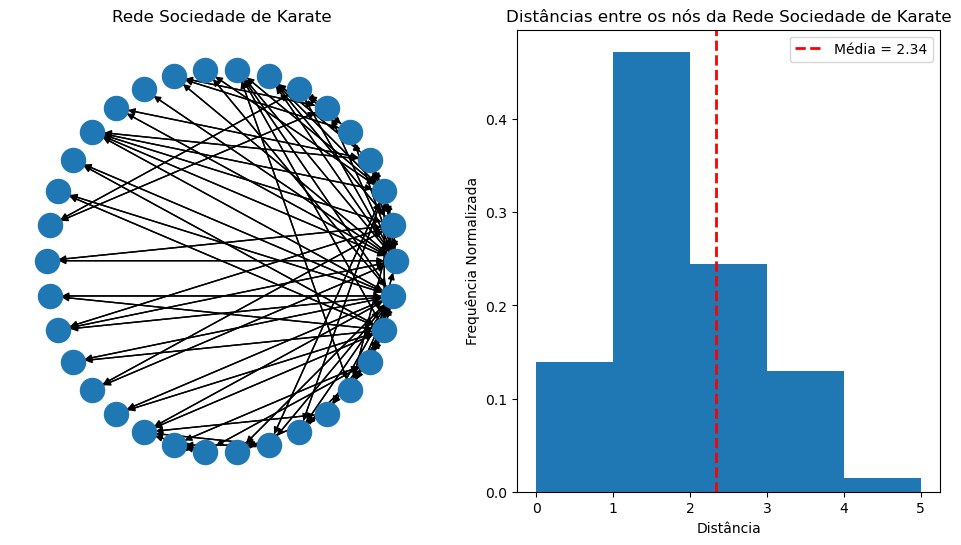

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Rede
plt.subplot(1, 2, 1)
nx.draw_circular(graph)
plt.title(f'Rede Sociedade de Karate')

# Histograma
plt.subplot(1, 2, 2)
histogram, bin_edges = np.histogram(distances, bins=np.arange(min(distances), max(distances)+2)-0.5, density=True)
plt.bar(bin_edges[:-1], histogram, width=1)
plt.axvline(average_path, color='red', linestyle='dashed', linewidth=2, label=f'Média = {round(avg_path, 2)}')
plt.xlabel('Distância')
plt.ylabel('Frequência Normalizada')
plt.title('Distâncias entre os nós da Rede Sociedade de Karate')
plt.legend()
plt.show()